In [30]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spst

In [31]:
# G = nx.Graph()
# G.add_nodes_from("Alice", "Bob", "Carl", "David", "Ernst", "Frank", "Gail", "Harry", "Irene", "Jen")
# elist = [()]
# G.add_edges_from(elist)

File = open('Adjacency.txt', 'rb')
# edgelist = nx.read_adjlist(File)
# edgelist = [sorted(edge) for edge in edgelist]
# G.add_edges_from(edgelist)

G = nx.read_adjlist(File)

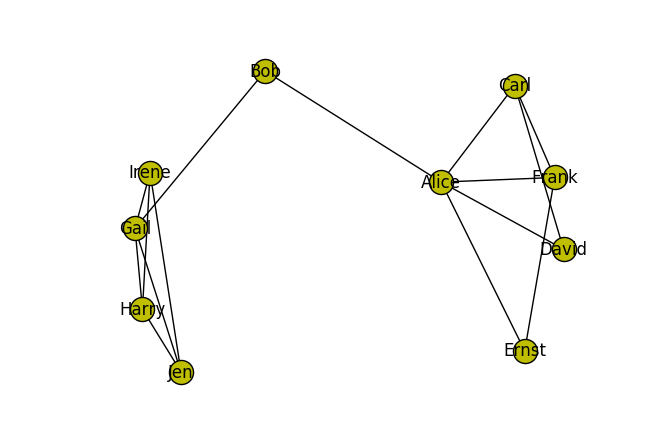

Order of the graph is:  10
Size of the graph is:  15


In [32]:
# Draw the network. What are the order and size of this network?

nx.draw(G, with_labels=True, node_color='y')
plt.show()

print("Order of the graph is: ", G.order())
print("Size of the graph is: ", G.size())

In [33]:
#Calculate the degree centrality of each node. Who is/are the most central nodes according to this measure?

dc = nx.degree_centrality(G)
print(dc)
print("\nAlice is the most central node according to degree centrality with a degree centrality value of", max(dc.values()))

{'David': 0.2222222222222222, 'Bob': 0.2222222222222222, 'Ernst': 0.2222222222222222, 'Frank': 0.3333333333333333, 'Harry': 0.3333333333333333, 'Irene': 0.3333333333333333, 'Gail': 0.4444444444444444, 'Jen': 0.3333333333333333, 'Alice': 0.5555555555555556, 'Carl': 0.3333333333333333}

Alice is the most central node according to degree centrality with a degree centrality value of 0.5555555555555556


In [34]:
# Calculate the closeness centrality of each node. Who is/are the most central nodes according to this measure?

cc = nx.closeness_centrality(G)
print(cc)
print("\nBob and Alice are the most central nodes according to closeness centrality with a closeness centrality value of", max(cc.values()))

{'David': 0.391304347826087, 'Bob': 0.5625, 'Ernst': 0.391304347826087, 'Frank': 0.4090909090909091, 'Harry': 0.375, 'Irene': 0.375, 'Gail': 0.5, 'Jen': 0.375, 'Alice': 0.5625, 'Carl': 0.4090909090909091}

Bob and Alice are the most central nodes according to closeness centrality with a closeness centrality value of 0.5625


In [35]:
# Calculate the betweenness centrality of each node. Who is/are the most central nodes according to this measure?

bc = nx.betweenness_centrality(G)
print(bc)
print("\nAlice is the most central node according to betweenness centrality with a betweenness centrality value of", max(bc.values()))

{'David': 0.0, 'Bob': 0.5555555555555556, 'Ernst': 0.0, 'Frank': 0.013888888888888888, 'Harry': 0.0, 'Irene': 0.0, 'Gail': 0.5, 'Jen': 0.0, 'Alice': 0.611111111111111, 'Carl': 0.013888888888888888}

Alice is the most central node according to betweenness centrality with a betweenness centrality value of 0.611111111111111


{'David': 2, 'Bob': 2, 'Ernst': 2, 'Frank': 3, 'Harry': 3, 'Irene': 3, 'Gail': 4, 'Jen': 3, 'Alice': 5, 'Carl': 3}
[2 2 2 3 3 3 4 3 5 3]
[ 0.          0.55555556  0.          0.01388889  0.          0.          0.5
  0.          0.61111111  0.01388889]


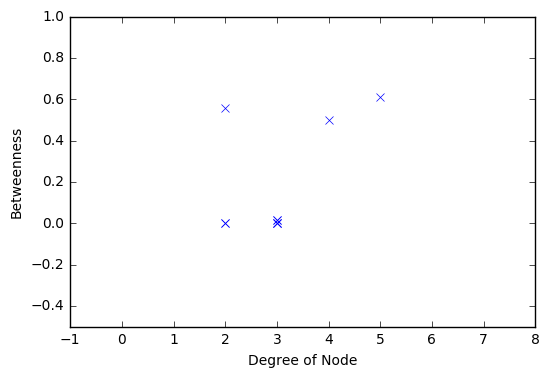

In [38]:
# Plot the degree of a node against its betweenness. 

degreelist = nx.degree(G)
print(degreelist)

# A=nx.linalg.adjacency_matrix(G) #converts graph into adjacency matrix
# S=A.toarray()
# print(S)

# d = np.zeros(10)
# for x in range (0, 10):
#     d[x] = np.count_nonzero([S[x]]) #Array D storing degrees along the diagonal
# print(d)

D = list(degreelist.values())
d = np.array(D)
print(d)

L = list(bc.values())
b = np.array(L)
print(b)

# print(type(d))
# print(type(b))

plt.plot(d, b, 'bx')
axes=plt.gca()
axes.set_xlim([-1,8])
axes.set_ylim([-0.5, 1])
plt.xlabel("Degree of Node")
plt.ylabel("Betweenness")
plt.show()

In [41]:
#Use your statistics knowledge to check if these variables are correlated (Use Pearson's correlation coefficient).

print(d, b)
r, p = spst.pearsonr(d, b)
print("r-statistic =", r, "p-value =", p)

print("\n\nPositive correlation")

[2 2 2 3 3 3 4 3 5 3] [ 0.          0.55555556  0.          0.01388889  0.          0.          0.5
  0.          0.61111111  0.01388889]
r-statistic = 0.513448967455 p-value = 0.12903466146


Positive correlation


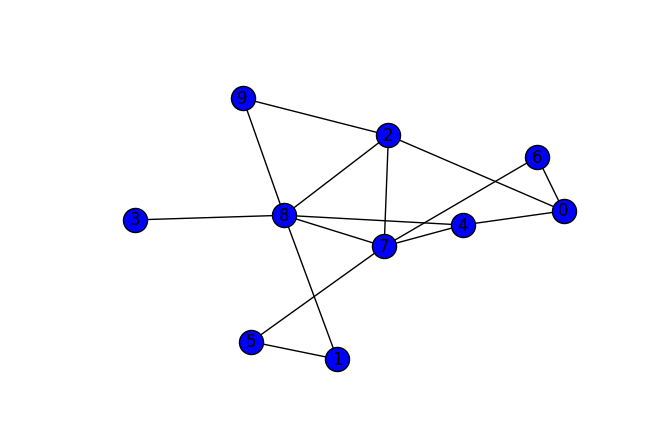



Average Clustering Coefficient of random graph:  0.20666666666666664
Average Clustering Coefficient of given graph:  0.7133333333333333
Gamma = 3.4516129032258065

The clustering coefficient of the random graph < clustering coefficient of given graph (random graphs are characterized by low clustering coefficient)


Average Path Length of random graph:  1.8444444444444446
Average Path Length of given graph:  2.3555555555555556
Lambda = 1.2771084337349397

The average path length of the random graph < average path length of given graph (random graphs are characterized by low average path length)



γ (gamma) and λ (lambda) fulfil certain criteria (e.g., γ>1 and λ≈1). Besides, the average path length and clustering coefficients for the given graph are higher than the Erdos-Renyi random graph. Small world networks are characterized by path length and clustering coeff lower than a regular lattice but higher than a random graph (both are lowest for random graphs). Therefore, this is a smal

In [47]:
# Consider a random network with the same order and size as the network documented above.

Gr = nx.gnm_random_graph(10, 15) #create Erdos-Renyi graph with 10 nodes and 15 edges
nx.draw(Gr, with_labels=True, node_color='b')
plt.show()

# NOTE: None of the functions below will work if the generated random graph is disconnected. Please refresh on such occasions. 

## What would its clustering coefficient be? 
#ideally, low, since the graph is random
Cr = nx.average_clustering(Gr)

## What would its average path length be?
#again, ideally low because the graph is random
Lr = nx.average_shortest_path_length(Gr)

## How do these compare to this network? 

C = nx.average_clustering(G)
print("\n\nAverage Clustering Coefficient of random graph: ", Cr)
print("Average Clustering Coefficient of given graph: ", C)
gam = C/Cr
print("Gamma =", gam)
print("\nThe clustering coefficient of the random graph < clustering coefficient of given graph",
      "(random graphs are characterized by low clustering coefficient)")

L = nx.average_shortest_path_length(G)
print("\n\nAverage Path Length of random graph: ", Lr)
print("Average Path Length of given graph: ",L)
lamb = L/Lr
print("Lambda =", lamb)
print("\nThe average path length of the random graph < average path length of given graph",
      "(random graphs are characterized by low average path length)")
    
    
## Would you say this is a small world network?

print("\n\n\nγ (gamma) and λ (lambda) fulfil certain criteria (e.g., γ>1 and λ≈1).",
      "Besides, the average path length and clustering coefficients for the given graph are higher than the Erdos-Renyi random graph.", 
      "Small world networks are characterized by path length and clustering coeff lower than a regular lattice", 
      "but higher than a random graph (both are lowest for random graphs).",
      "Therefore, this is a small world network.")